In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [6]:
features = data.drop(['id'], axis = 1)
features.shape

(4000, 2)

In [7]:
from sklearn.cluster import KMeans

In [8]:
my_cluster_model = KMeans(n_clusters=2)

In [9]:
labels = my_cluster_model.fit_predict(features)

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
data['cluster'] = my_cluster_model.labels_

In [11]:
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


<AxesSubplot: ylabel='count'>

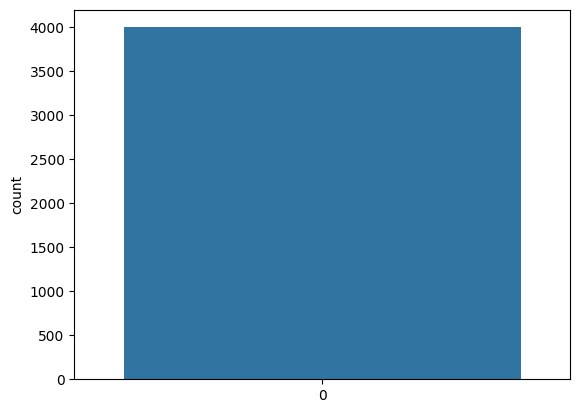

In [13]:
sns.countplot(labels)

In [14]:
data.groupby('cluster').count()['id']   

cluster
0    3200
1     800
Name: id, dtype: int64

In [15]:
my_cluster_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

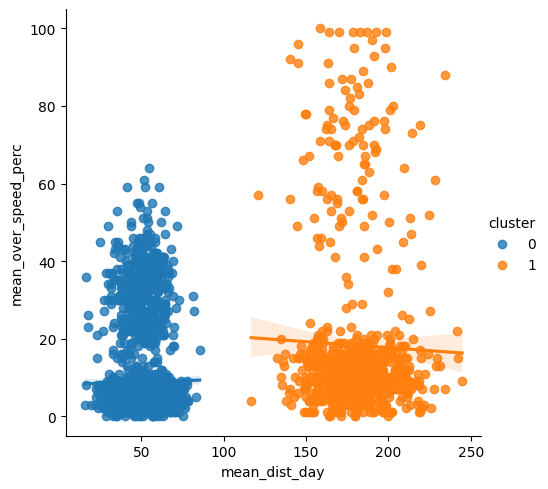

In [17]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


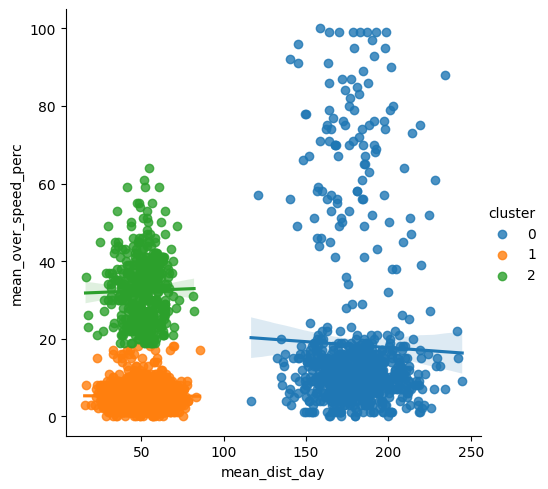

In [19]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit_predict(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');

In [20]:
my_cluster_model.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 49.99263253,   5.20447169],
       [ 50.40482436,  32.36533958]])

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


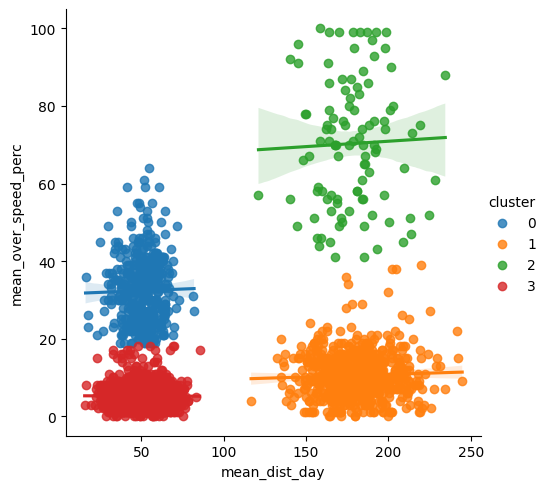

In [21]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit_predict(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');

In [22]:
my_cluster_model.cluster_centers_

array([[ 50.40482436,  32.36533958],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 49.99263253,   5.20447169]])

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


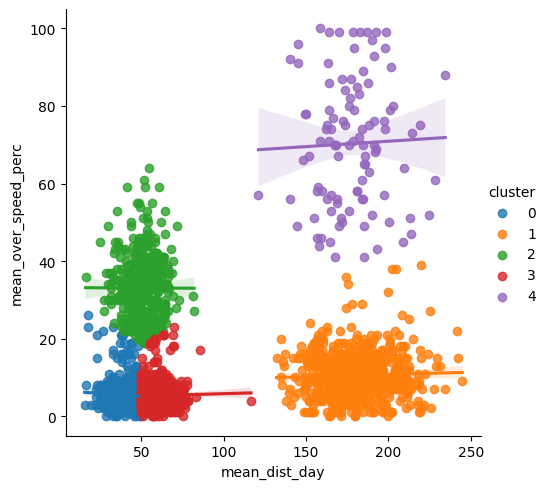

In [23]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit_predict(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');

In [24]:
my_cluster_model.labels_

array([2, 2, 2, ..., 1, 1, 1])

# Finding K value

In [ ]:
wcss=[]      #within a cluster sum of square (c-xi)2         
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit_predict(features)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [ ]:
wcss

In [ ]:
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
my_cluster_model = KMeans(n_clusters=2)
my_cluster_model.fit_predict(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# s = (b - a) / max(a, b) 

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(features)
    silhouette_avg = silhouette_score(features, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)